# q1

Matrix multiplication combines the elements of a row from the first matrix with those of a column from the second, followed by summing the products. For matrices A (m x k) and B (k x n), when a row of matrix A of k elements is multiplied with k elements of a column of matrix B, there will be k multiplications and k - 1 additions results into a single element, as there are m rows in first matrix and n columns so there will be mn multiplications of row and column so in total there will be m*n*k multiplucations and m*n*(k-1) additions.

# q2

In [63]:
import numpy as np
import timeit

n = int(input("Enter the number of rows for the first matrix (n): "))
k = int(input("Enter the number of columns for the first matrix and rows for the second matrix (k): "))
m = int(input("Enter the number of columns for the second matrix (m): "))

# Initialize the matrices with zeros
matrix1 = [[0 for _ in range(k)] for _ in range(n)]
matrix2 = [[0 for _ in range(m)] for _ in range(k)]
result_matrix = [[0 for _ in range(m)] for _ in range(n)]

for i in range(n):
    matrix1[i] = list(map(int, input().split()))
for i in range(k):
    matrix2[i] = list(map(int, input().split()))

# Multiply the matrices using nested loops and measure the time taken
start_time1 = timeit.default_timer()
for i in range(n):
    for j in range(m):
        for a in range(k):
            result_matrix[i][j] += matrix1[i][a] * matrix2[a][j]
end_time1 = timeit.default_timer()

# Print the resulting matrix and the time taken
print(result_matrix)
time1 = (end_time1 - start_time1) * 10000
print(time1)

# Convert the lists to NumPy arrays
M1 = np.array(matrix1)
M2 = np.array(matrix2)

# Multiply the matrices using NumPy's dot function and measure the time taken
start_time2 = timeit.default_timer()
result = np.dot(M1, M2)
end_time2 = timeit.default_timer()

# Print the resulting matrix and the time taken
print(result)
time2 = (end_time2 - start_time2) * 10000
print(time2)

# Compare the time taken by each method and print out which one is faster
if time1 < time2:
    print("Multiplying matrices using nested loops is faster.")
else:
    print("Multiplying matrices using NumPy's dot function is faster.")


Enter the number of rows for the first matrix (n):  3
Enter the number of columns for the first matrix and rows for the second matrix (k):  3
Enter the number of columns for the second matrix (m):  3
 1 1 1
 1 1 1
 1 1 1
 1 1 1
 1 1 1
 1 1 1


[[3, 3, 3], [3, 3, 3], [3, 3, 3]]
2.0829998538829386
[[3 3 3]
 [3 3 3]
 [3 3 3]]
0.9529999806545675
Multiplying matrices using NumPy's dot function is faster.


# q3

# q4

The equation is \( f(x, y) = x^2 * y + y^3 \sin(x) \). 

the partial derivatives:

\begin{align}
    \frac{\partial f}{\partial x} &= 2x*y + y^3 \cos(x) \\
    \frac{\partial f}{\partial y} &= x^2 + 3y^2 \sin(x)
\end{align}

So, the gradient is given by:

\begin{equation}
    \nabla f(x, y) = \begin{bmatrix}
        2x*y + y^3 \cos(x) \\
        x^2 + 3y^2 \sin(x)
    \end{bmatrix}
\end{equation}

# q5

In [55]:
import jax
import jax.numpy as jnp
from jax import random

# Define a random key
key = random.PRNGKey(0)
def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)

gradient_f = jax.grad(f, argnums=(0, 1))
angles_deg = [0.0, 45.0, 90.0] 

# Evaluate the gradient at a few random values of x and y
for _ in range(3):
    x = random.uniform(key, (), minval=0.0, maxval=1.0)
    y = random.uniform(key, (), minval=0.0, maxval=1.0)
    print(f"At (x, y) = ({x}, {y}), the gradient is {gradient_f(x, y)}")

# Convert the angles to radians
angles_rad = [jnp.radians(angle) for angle in angles_deg]

for angle_rad in angles_rad:
    print(f"At x = {angle_rad} radians, the gradient is {gradient_f(angle_rad, 1.0)}") 


At (x, y) = (0.41845703125, 0.41845703125), the gradient is (Array(0.41716468, dtype=float32), Array(0.3885702, dtype=float32))
At (x, y) = (0.41845703125, 0.41845703125), the gradient is (Array(0.41716468, dtype=float32), Array(0.3885702, dtype=float32))
At (x, y) = (0.41845703125, 0.41845703125), the gradient is (Array(0.41716468, dtype=float32), Array(0.3885702, dtype=float32))
At x = 0.0 radians, the gradient is (Array(1., dtype=float32, weak_type=True), Array(0., dtype=float32, weak_type=True))
At x = 0.7853981852531433 radians, the gradient is (Array(2.277903, dtype=float32, weak_type=True), Array(2.7381706, dtype=float32, weak_type=True))
At x = 1.5707963705062866 radians, the gradient is (Array(3.1415927, dtype=float32, weak_type=True), Array(5.4674015, dtype=float32, weak_type=True))


# q6

In [36]:
import sympy as sp

x, y = sp.symbols('x y')

# Define the function f(x, y) = x^2*y + y^3*sin(x)
f = x**2 * y + y**3 * sp.sin(x)

# Compute the partial derivative of f with respect to x
df_dx = sp.diff(f, x)

# Compute the partial derivative of f with respect to y
df_dy = sp.diff(f, y)

print("Partial derivative with respect to x:", df_dx)
print("Partial derivative with respect to y:", df_dy)


Partial derivative with respect to x: 2*x*y + y**3*cos(x)
Partial derivative with respect to y: x**2 + 3*y**2*sin(x)


# q7

In [64]:
#Q7 The following dictonary consiists of marks, name, rollno. of students in branch1 and branch 2 from 2022-2025 years.
def display_records(records):
    for year, branches in records.items():
        print(year)
        for branch, student in branches.items():
            print(f'  {branch}')
            print(f'    Roll Number: {student["Roll Number"]}, Name: {student["Name"]}')
            print(f'    Marks:')
            for subject, marks in student["Marks"].items():
                print(f'      {subject}: {marks}')


                
student_records={
    2022:{
        'Branch1':{#Add as many students details as you requried in this branch here  only one student is added in each branch in each year.
        'Roll Number':15,
            'Name':'Kanchana',
            'Marks':{#Add as many subjects you requied.
            'Maths':10,'Physics':50}},
            'Branch2':{
            'Roll Number':16,
            'Name':'Bahu',
            'Marks':{
            'Maths':81,'Physics':69}}},
     2023:{'Branch1':{'Roll Number':31,'Name':'Cimran','Marks':{'Telugu':91,'English':56}},'Branch2':{'Roll Number':32,'Name':'Doney','Marks':{'Telugu':100,'English':88}}},
    2024:{'Branch1':{'Roll Number':45,'Name':'Eswar','Marks':{'Economics':96,'Commerce':95}},'Branch2':{'Roll Number':46,'Name':'Fraz','Marks':{'Economics':90,'Commerce':100}}},
   2025:{'Branch1':{'Roll Number':61,'Name':'Guna','Marks':{'Biology':81,'Zoology':85}},'Branch2':{'Roll Number':62,'Name':'Hari','Marks':{'Biology':10,'Zoology':79}}}
}


# Assuming you've added data to the nested dictionary
display_records(student_records)

2022
  Branch1
    Roll Number: 15, Name: Kanchana
    Marks:
      Maths: 10
      Physics: 50
  Branch2
    Roll Number: 16, Name: Bahu
    Marks:
      Maths: 81
      Physics: 69
2023
  Branch1
    Roll Number: 31, Name: Cimran
    Marks:
      Telugu: 91
      English: 56
  Branch2
    Roll Number: 32, Name: Doney
    Marks:
      Telugu: 100
      English: 88
2024
  Branch1
    Roll Number: 45, Name: Eswar
    Marks:
      Economics: 96
      Commerce: 95
  Branch2
    Roll Number: 46, Name: Fraz
    Marks:
      Economics: 90
      Commerce: 100
2025
  Branch1
    Roll Number: 61, Name: Guna
    Marks:
      Biology: 81
      Zoology: 85
  Branch2
    Roll Number: 62, Name: Hari
    Marks:
      Biology: 10
      Zoology: 79


# q8

# q9

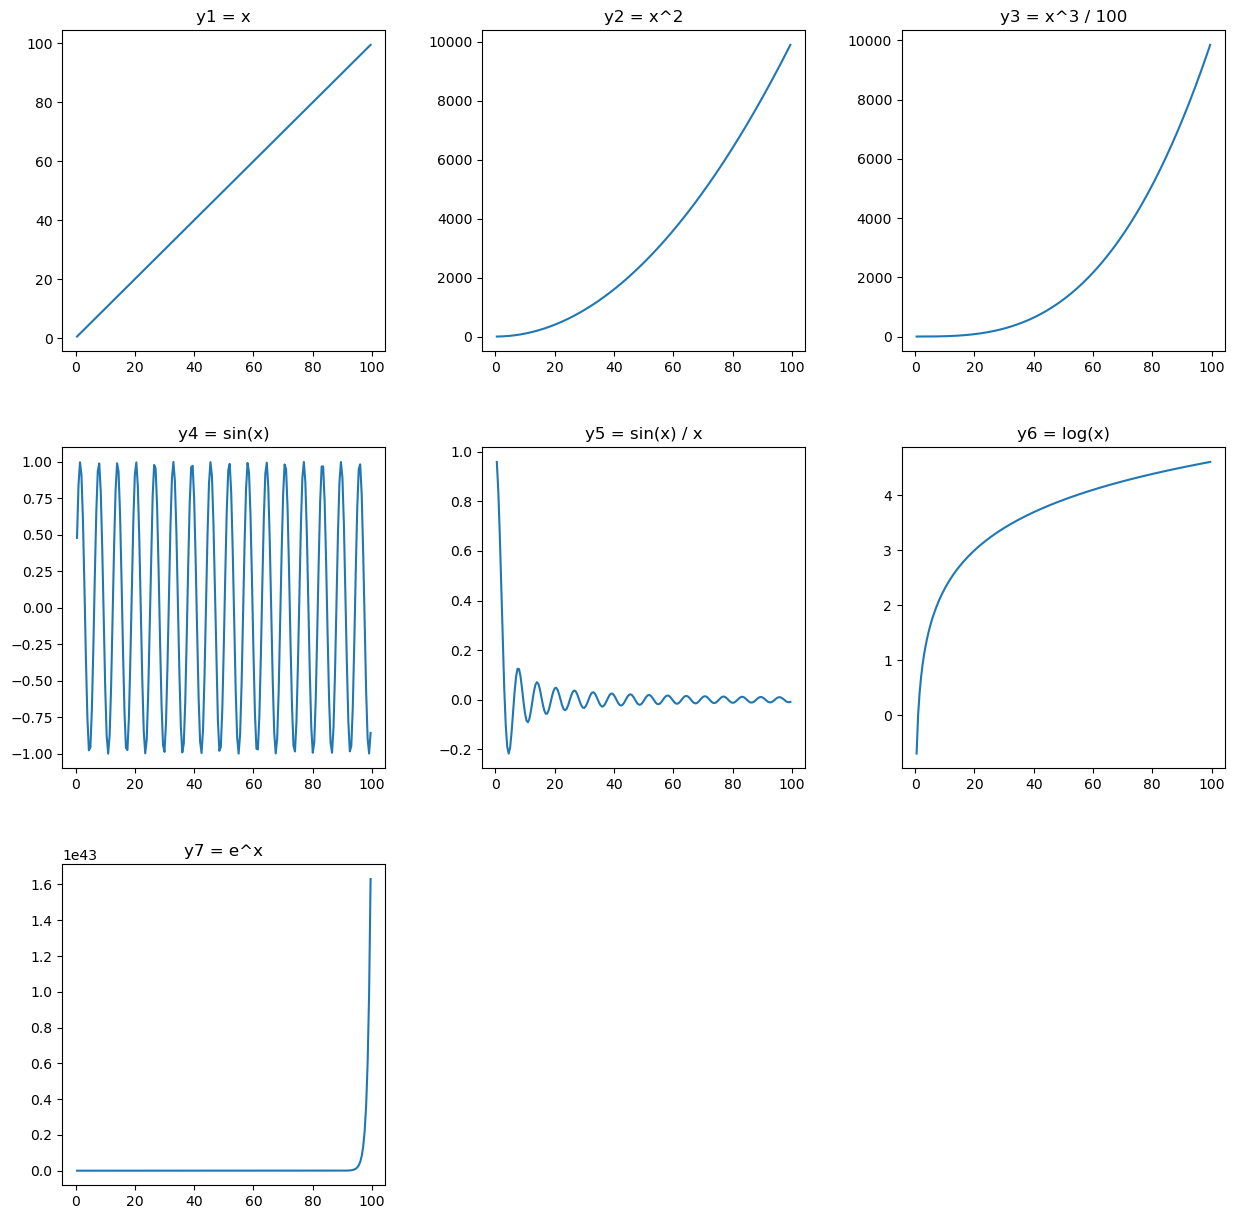

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Define the domain of x from 0.5 to 100.0 in steps of 0.5
x = np.arange(0.5, 100, 0.5)

# Define the functions to be plotted
y1 = x
y2 = x**2
y3 = x**3 / 100
y4 = np.sin(x)
y5 = np.sin(x) / x
y6 = np.log(x)
y7 = np.exp(x)

# Create a figure with a specified size
plt.figure(figsize=(15, 15))

# Plot each function in a separate subplot with a title
plt.subplot(3, 3, 1)
plt.plot(x, y1)
plt.title('y1 = x')

plt.subplot(3, 3, 2)
plt.plot(x, y2)
plt.title('y2 = x^2')

plt.subplot(3, 3, 3)
plt.plot(x, y3)
plt.title('y3 = x^3 / 100')

plt.subplot(3, 3, 4)
plt.plot(x, y4)
plt.title('y4 = sin(x)')

plt.subplot(3, 3, 5)
plt.plot(x, y5)
plt.title('y5 = sin(x) / x')

plt.subplot(3, 3, 6)
plt.plot(x, y6)
plt.title('y6 = log(x)')

plt.subplot(3, 3, 7)
plt.plot(x, y7)
plt.title('y7 = e^x')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Display the plot
plt.show()


# q10

In [33]:
import numpy as np
import pandas as pd

# Generates a 20x5 matrix with random numbers within the range 1 to 2
matrix = np.random.uniform(1, 2, (20, 5))

# Creates a dataframe
df = pd.DataFrame(matrix, columns=['a    ', ' b    ', ' c    ', ' d   ', 'e    '])

print(df)
print("The column with highest standard deviation is:",df.std().idxmax())
print("The row with the lowest mean is:",df.mean(axis=1).idxmin())


       a         b         c          d        e    
0   1.590018  1.072069  1.259626  1.044335  1.493339
1   1.378591  1.671265  1.133748  1.997105  1.523406
2   1.642115  1.261229  1.496330  1.191476  1.348865
3   1.898993  1.922831  1.267862  1.027727  1.529994
4   1.871747  1.262548  1.907131  1.319154  1.810414
5   1.688399  1.955630  1.576884  1.066735  1.536743
6   1.672356  1.361610  1.433139  1.142680  1.597014
7   1.527959  1.065621  1.991908  1.615371  1.273395
8   1.749230  1.711215  1.673577  1.278047  1.222010
9   1.511254  1.550902  1.072975  1.288939  1.934938
10  1.308085  1.519287  1.769543  1.222603  1.645772
11  1.203774  1.310037  1.674023  1.347879  1.636096
12  1.882529  1.069391  1.352098  1.001435  1.355494
13  1.880469  1.034987  1.097831  1.931128  1.794825
14  1.715877  1.241102  1.178750  1.022121  1.684764
15  1.944813  1.563775  1.006630  1.909840  1.890264
16  1.465806  1.825472  1.295293  1.439062  1.969650
17  1.854516  1.016403  1.124182  1.309473  1.

# q11

In [34]:
import numpy as np
import pandas as pd

# Generates a 20x5 matrix with random numbers within the range 1 to 2
matrix = np.random.uniform(1, 2, (20, 5))

# Creates a dataframe
df = pd.DataFrame(matrix, columns=['a    ', ' b    ', ' c    ', ' d   ', 'e    '])

# Add a new column 'f' which is the sum of the columns 'a', 'b', 'c', 'd', 'e'
df['f'] = df.sum(axis=1)

# Add another column 'g' where the value is 'LT8' if the value in the column 'f' is less than 8 and 'GT8' otherwise
df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')


print(df)

# Find and print the number of rows where the value in the column 'g' is 'LT8'
print("Number of rows where 'g' is 'LT8':", len(df[df['g'] == 'LT8']))

# Find and print the standard deviation of the column 'f' for the rows where the value in the column 'g' is 'LT8' and 'GT8' respectively
print("Standard deviation of 'f' where 'g' is 'LT8':", df[df['g'] == 'LT8']['f'].std())
print("Standard deviation of 'f' where 'g' is 'GT8':", df[df['g'] == 'GT8']['f'].std())


       a         b         c          d        e             f    g
0   1.545514  1.259597  1.523383  1.645760  1.833466  7.807720  LT8
1   1.256519  1.648661  1.147036  1.258252  1.653053  6.963520  LT8
2   1.513342  1.598991  1.941513  1.940668  1.307488  8.302003  GT8
3   1.741828  1.350205  1.287458  1.154524  1.762650  7.296665  LT8
4   1.142993  1.667455  1.658234  1.166356  1.371852  7.006890  LT8
5   1.840015  1.353866  1.445374  1.615240  1.474720  7.729216  LT8
6   1.816090  1.415003  1.147220  1.159386  1.007059  6.544757  LT8
7   1.254742  1.587624  1.042194  1.078584  1.140990  6.104134  LT8
8   1.634713  1.232146  1.884872  1.329358  1.942197  8.023286  GT8
9   1.005351  1.193401  1.395408  1.224418  1.855885  6.674462  LT8
10  1.555221  1.707226  1.483128  1.647546  1.293128  7.686248  LT8
11  1.016300  1.513981  1.025281  1.531448  1.508962  6.595972  LT8
12  1.476360  1.506355  1.678713  1.226122  1.151026  7.038576  LT8
13  1.432051  1.471902  1.702661  1.052070  1.92

# q12

In [20]:
import numpy as np

# Create a 1D array
a = np.array([1, 2, 3])

# Create a 2D array
b = np.array([[1, 2, 3], [4, 5, 6]])

# Broadcasting allows these arrays of different shapes to be added together
c = a + b

print("Array a:")
print(a)

print("\nArray b:")
print(b)

print("\nResult of broadcasting addition (a + b):")
print(c)


Array a:
[1 2 3]

Array b:
[[1 2 3]
 [4 5 6]]

Result of broadcasting addition (a + b):
[[2 4 6]
 [5 7 9]]


# q13

In [42]:
13
import numpy as np

def compute_argmin(array):
    index = 0
    min = array[0]
    for i in range(1, len(array)):
        if array[i] < min:
            min = array[i]
            index = i
    return index

# Create a numpy array
arr = np.array(list(map(float, input("Enter elements: ").split())))

# Computes argmin using the above pyhton function
index = compute_argmin(arr)

# Computing argmin using the built-in function in Numpy
numpy_index = np.argmin(arr)

print("Index of the minimum element in the array is",index)
if(index == numpy_index):
    print("Index obtained in the both methods is same") 
    
else:
    print("Index obtained in the both methods is not same")

Enter elements:  1 2 3 5 6 0


Index of the minimum element in the array is 5
Index obtained in the both methods is same
